In [ ]:
"""
Ho va Ten: Bui Thi Thanh Xuan
MSSV: 19110522
"""

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

In [ ]:
train = pd.read_csv("https://raw.githubusercontent.com/huynhthanh98/ML/master/Lab03/bt_train.csv")
train.head()

,x1,x2,label
0,55.808717,54.602061,0
1,50.882672,52.736342,0
2,53.196444,44.208365,0
3,54.727839,60.406845,0
4,49.771372,48.405605,0


In [ ]:
valid = pd.read_csv("https://raw.githubusercontent.com/huynhthanh98/ML/master/Lab03/bt_valid.csv")
valid.head()

,x1,x2,label
0,53.533304,52.619277,0
1,46.542143,49.523852,0
2,53.689006,49.716690,0
3,45.393529,49.876802,0
4,47.847049,50.597015,0


In [ ]:
X_train = train[['x1','x2']].values
Y_train = train['label'].values

In [ ]:
print(X_train.shape)
print(Y_train.shape)

(900, 2)
(900,)


In [ ]:
X_valid = valid[['x1','x2']].values
Y_valid = valid['label'].values

In [ ]:
print(X_valid.shape)
print(Y_valid.shape)

(300, 2)
(300,)


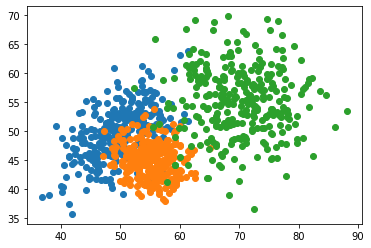

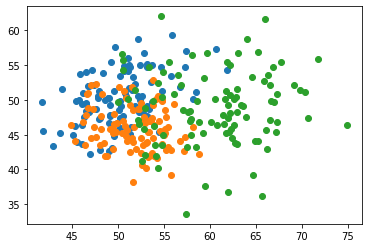

In [ ]:
#Vẽ hình 
plt.scatter(train['x1'].values[train['label'].values == 0], train['x2'].values[train['label'].values==0])
plt.scatter(train['x1'].values[train['label'].values == 1], train['x2'].values[train['label'].values==1])
plt.scatter(train['x1'].values[train['label'].values == 2], train['x2'].values[train['label'].values==2])


plt.figure()

plt.scatter(valid['x1'].values[valid['label'].values == 0], valid['x2'].values[valid['label'].values==0])
plt.scatter(valid['x1'].values[valid['label'].values == 1], valid['x2'].values[valid['label'].values==1])
plt.scatter(valid['x1'].values[valid['label'].values == 2], valid['x2'].values[valid['label'].values==2])


In [ ]:
## normalization
x_mean = np.mean(X_train)
x_std = np.std(X_train)

X_train = (X_train - x_mean)/ x_std
X_valid = (X_valid - x_mean)/ x_std

In [ ]:
X_train

array([[ 0.1861162 ,  0.05545221],
       [-0.34730555, -0.14657899],
       [-0.09675642, -1.07003966],
       ...,
       [ 1.11065448,  0.69739676],
       [ 1.44901379, -0.28449165],
       [ 1.85226894,  0.14147163]])

In [ ]:
# Encode label into one-hot vectors
enc = OneHotEncoder()
y_train_onehot = enc.fit_transform(Y_train.reshape(-1,1)).toarray()
y_valid_onehot = enc.fit_transform(Y_valid.reshape(-1,1)).toarray()

In [ ]:
y_train_onehot.shape

(900, 3)

In [ ]:
def softmax(Z):
    '''
        Z: (NxC)
        return: A: (NxC)
    '''
    e_z = np.exp(Z)
    A = e_z/e_z.sum(axis=1).reshape(-1,1)
    return A
def loss(X, Y, W):
    '''
        X: Nxp
        Y: NxC
        W: pxC
        return: float
    '''
    A = softmax(X.dot(W))
    return -np.sum(Y * np.log(A))

In [ ]:
def grad(X, Y, W):
    '''
        X: Nxp
        Y: NxC
        W: pxC
        return: pxC
    '''
    A = softmax(X.dot(W))    
    E = A-Y # NxC
    return X.T.dot(E)

In [ ]:
def logistic_Reg(x_train,y_train,x_valid,y_valid):

    
    best_theta = []      #biến để lưu tham số mà có accuracy tốt nhất trên tập valid
    best_val_acc = -1.0

    #Thêm một cột bằng 1 X = (1,x1,x2)
    x_train = np.concatenate([np.ones([x_train.shape[0],1]),x_train],axis=1)
    x_valid = np.concatenate([np.ones([x_valid.shape[0],1]),x_valid],axis=1)

    #Khởi tạo ma trận theta
    theta = np.random.randn(x_train.shape[1], y_train.shape[1])
    #theta_valid = np.random.randn(x_valid.shape[1], y_valid.shape[1])

    list_theta = [] #Lưu các theta 
    hist_loss_train = []  #Lưu các loss ở tập train
    hist_loss_valid = []  #Lưu các loss ở tập train
    lrn_rate = 0.01

    for epoch in range(50):
        theta = theta - lrn_rate * grad(x_train,y_train,theta)
        #theta_valid = theta_valid - lrn_rate * grad(x_valid,y_valid,theta_valid)
        list_theta.append(theta)

        #Train
        train_cost = loss(x_train,y_train, theta)
        pred_train = np.argmax(softmax(x_train.dot(theta)),axis=1)
        acc_train = np.mean(pred_train == np.argmax(y_train,axis=1))

        #Valid
        valid_cost = loss(x_valid,y_valid, theta)
        pred_valid = np.argmax(softmax(x_valid.dot(theta)),axis=1)
        acc_valid = np.mean(pred_valid == np.argmax(y_valid,axis=1))

        hist_loss_train.append(train_cost)
        hist_loss_valid.append(valid_cost)

        if acc_valid > best_val_acc:
            ## lưu tham số tốt nhất
            best_val_acc = acc_valid
            best_theta = theta

        print("epoch {} - loss {:.4f} - acc {:.4f} - val_loss {:.4f} - val_acc {:.4f}".format(epoch, train_cost, acc_train, valid_cost, acc_valid))
    final_theta = best_theta
    pred_train = np.argmax(softmax(x_train.dot(final_theta)),axis=1)
    pred_valid = np.argmax(softmax(x_valid.dot(final_theta)),axis=1)
    train_acc = np.mean(pred_train == np.argmax(y_train,axis=1))
    valid_acc = np.mean(pred_valid == np.argmax(y_valid,axis=1))
    print("Accuracy on train: ", train_acc)
    print("Accuracy on valid: ", valid_acc)
    return hist_loss_train,hist_loss_valid,final_theta

In [ ]:
hist_loss_train,hist_loss_valid,theta = logistic_Reg(X_train,y_train_onehot,X_valid,y_valid_onehot)

epoch 0 - loss 547.2246 - acc 0.7000 - val_loss 476.7647 - val_acc 0.4233
epoch 1 - loss 610.9836 - acc 0.7344 - val_loss 338.3237 - val_acc 0.5567
epoch 2 - loss 719.9941 - acc 0.6711 - val_loss 485.8441 - val_acc 0.5233
epoch 3 - loss 882.8026 - acc 0.6889 - val_loss 554.7747 - val_acc 0.4800
epoch 4 - loss 564.1004 - acc 0.7356 - val_loss 433.6442 - val_acc 0.5567
epoch 5 - loss 550.2323 - acc 0.7878 - val_loss 450.4232 - val_acc 0.5533
epoch 6 - loss 408.7453 - acc 0.8033 - val_loss 397.9909 - val_acc 0.5867
epoch 7 - loss 383.2106 - acc 0.8333 - val_loss 383.6842 - val_acc 0.5900
epoch 8 - loss 330.3594 - acc 0.8411 - val_loss 371.3116 - val_acc 0.5967
epoch 9 - loss 316.3119 - acc 0.8611 - val_loss 355.9538 - val_acc 0.6133
epoch 10 - loss 297.6629 - acc 0.8767 - val_loss 357.4086 - val_acc 0.6067
epoch 11 - loss 291.0325 - acc 0.8744 - val_loss 346.1497 - val_acc 0.6067
epoch 12 - loss 283.3373 - acc 0.8844 - val_loss 351.3168 - val_acc 0.6200
epoch 13 - loss 279.9992 - acc 0.88

Text(0.5, 1.0, 'Loss Valid')

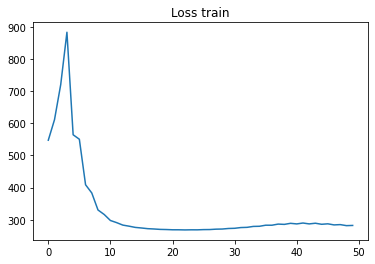

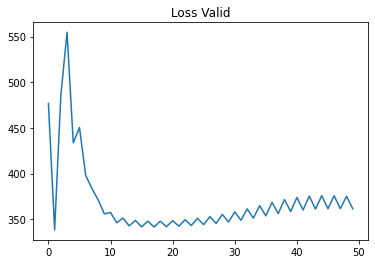

In [ ]:
plt.plot(hist_loss_train)
plt.title('Loss train')

plt.figure()

plt.plot(hist_loss_valid)
plt.title('Loss Valid')

In [ ]:
# Softmax Regression with Sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
clf = LogisticRegression(C=1e5, 
        solver = 'lbfgs', multi_class = 'multinomial').fit(X_train, Y_train)
print(f'Sklearn model accuracy: {clf.score(X_train,Y_train)}')
print(f'Sklearn model accuracy: {clf.score(X_valid,Y_valid)}')


Sklearn model accuracy: 0.8855555555555555
Sklearn model accuracy: 0.6333333333333333
